<a href="https://colab.research.google.com/github/rposhala/Recommender-System-on-MovieLens-dataset/blob/main/Item_based_Collaborative_Recommender_System_using_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sweetviz as sv

## Loading MovieLens dataset

In [2]:
df_tags = pd.read_csv("../data/tags.csv")
df_tags.head()

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,1240597180
1,65,208,dark hero,1368150078
2,65,353,dark hero,1368150079
3,65,521,noir thriller,1368149983
4,65,592,dark hero,1368150078


In [3]:
len(df_tags), max(df_tags['movieId']),min(df_tags['movieId']), max(df_tags['userId']), min(df_tags['userId'])

(465564, 131258, 1, 138472, 18)

In [4]:
df_ratings = pd.read_csv("../data/ratings_small.csv")
df_ratings.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580


In [5]:
len(df_ratings), max(df_ratings['rating']),min(df_ratings['rating']), max(df_ratings['userId']), min(df_ratings['userId'])

(324215, 5.0, 0.5, 2215, 1)

In [6]:
df_movies = pd.read_csv("../data/movies.csv")
df_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [7]:
len(df_movies)

27278

## Merging required datasets

In [8]:
merged_df = pd.merge(df_ratings, df_movies, how='inner', on='movieId')
merged_df.head()

,userId,movieId,rating,timestamp,title,genres
0,1,2,3.5,1112486027,Jumanji (1995),Adventure|Children|Fantasy
1,5,2,3.0,851527569,Jumanji (1995),Adventure|Children|Fantasy
2,13,2,3.0,849082742,Jumanji (1995),Adventure|Children|Fantasy
3,29,2,3.0,835562174,Jumanji (1995),Adventure|Children|Fantasy
4,34,2,3.0,846509384,Jumanji (1995),Adventure|Children|Fantasy


In [9]:
len(merged_df)

324215

## Exploratory data analysis

Example of a multiple rating scenario by a specific movie:

In [10]:
merged_df[(merged_df['title'] == 'Chasing Amy (1997)') ]

,userId,movieId,rating,timestamp,title,genres
186577,21,1639,3.0,992190290,Chasing Amy (1997),Comedy|Drama|Romance
186578,23,1639,3.0,914457720,Chasing Amy (1997),Comedy|Drama|Romance
186579,24,1639,5.0,994230323,Chasing Amy (1997),Comedy|Drama|Romance
186580,33,1639,5.0,966285369,Chasing Amy (1997),Comedy|Drama|Romance
186581,40,1639,1.0,941626558,Chasing Amy (1997),Comedy|Drama|Romance
...,...,...,...,...,...,...
186797,2170,1639,4.0,1105468934,Chasing Amy (1997),Comedy|Drama|Romance
186798,2171,1639,2.0,938674281,Chasing Amy (1997),Comedy|Drama|Romance
186799,2184,1639,4.0,1090730522,Chasing Amy (1997),Comedy|Drama|Romance
186800,2198,1639,4.0,945462867,Chasing Amy (1997),Comedy|Drama|Romance


In [11]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 324215 entries, 0 to 324214
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     324215 non-null  int64  
 1   movieId    324215 non-null  int64  
 2   rating     324215 non-null  float64
 3   timestamp  324215 non-null  int64  
 4   title      324215 non-null  object 
 5   genres     324215 non-null  object 
dtypes: float64(1), int64(3), object(2)
memory usage: 17.3+ MB


In [12]:
my_report = sv.analyze(merged_df)
#my_report.show_html('../reports/EDA_complete_report_sweet_viz.html') # Default arguments will generate to "SWEETVIZ_REPORT.html"

                                             |                                             | [  0%]   00:00 ->…

In [13]:
refined_dataset = merged_df.groupby(by=['userId','title','movieId'], as_index=False).agg({"rating":"mean"})

refined_dataset.head()

,userId,title,movieId,rating
0,1,2001: A Space Odyssey (1968),924,3.5
1,1,28 Days Later (2002),6502,3.5
2,1,"7th Voyage of Sinbad, The (1958)",3153,4.0
3,1,"Adventures of Baron Munchausen, The (1988)",4467,4.0
4,1,Alien (1979),1214,4.0


In [14]:
refined_dataset[(refined_dataset['title'] == 'Chasing Amy (1997)') ]

,userId,title,movieId,rating
2163,21,Chasing Amy (1997),1639,3.0
2449,23,Chasing Amy (1997),1639,3.0
2625,24,Chasing Amy (1997),1639,5.0
3865,33,Chasing Amy (1997),1639,5.0
4342,40,Chasing Amy (1997),1639,1.0
...,...,...,...,...
317838,2170,Chasing Amy (1997),1639,4.0
318048,2171,Chasing Amy (1997),1639,2.0
319593,2184,Chasing Amy (1997),1639,4.0
321601,2198,Chasing Amy (1997),1639,4.0


In [15]:
refined_dataset.head(20)

,userId,title,movieId,rating
0,1,2001: A Space Odyssey (1968),924,3.5
1,1,28 Days Later (2002),6502,3.5
2,1,"7th Voyage of Sinbad, The (1958)",3153,4.0
3,1,"Adventures of Baron Munchausen, The (1988)",4467,4.0
4,1,Alien (1979),1214,4.0
5,1,Aliens (1986),1200,4.0
6,1,"American Werewolf in London, An (1981)",1321,4.0
7,1,Apocalypse Now (1979),1208,3.5
8,1,Army of Darkness (1993),1215,4.0
9,1,Austin Powers: The Spy Who Shagged Me (1999),2683,3.5


In [16]:
refined_dataset.to_csv('../data/refined_dataset.csv', encoding='utf-8')

In [17]:
refined_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324215 entries, 0 to 324214
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   userId   324215 non-null  int64  
 1   title    324215 non-null  object 
 2   movieId  324215 non-null  int64  
 3   rating   324215 non-null  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 9.9+ MB


In [18]:
num_users = len(refined_dataset['userId'].value_counts())
print(num_users)
num_items = len(refined_dataset['title'].value_counts())
print(num_items)

2215
11158


In [19]:
print('Unique number of users in the dataset: {}'.format(num_users))
print('Unique number of movies in the dataset: {}'.format(num_items))

Unique number of users in the dataset: 2215
Unique number of movies in the dataset: 11158


In [20]:
rating_count_df = pd.DataFrame(refined_dataset.groupby(['rating']).size(), columns=['count'])
rating_count_df

,count
rating,
0.5,4757
1.0,11589
1.5,4298
2.0,23158
2.5,13683
3.0,70439
3.5,35198
4.0,90025
4.5,25208


In [21]:
sum_column_rating_count_df = rating_count_df.sum(axis=0)
sum_column_rating_count_df

count    324215
dtype: int64

Text(0, 0.5, 'number of ratings')

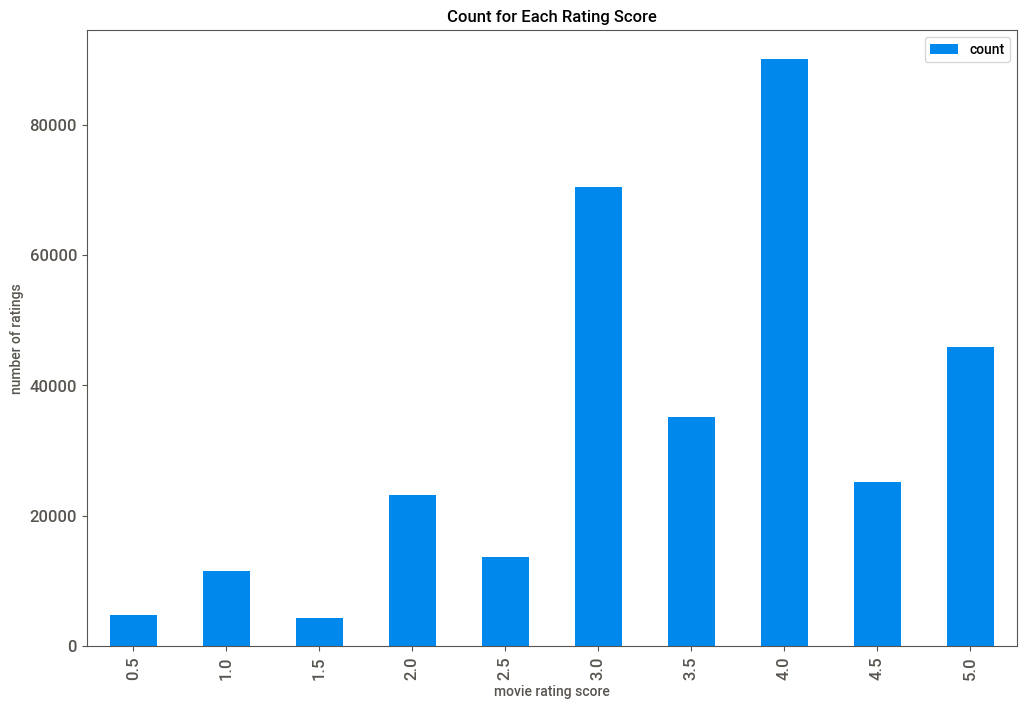

In [22]:
ax = rating_count_df.reset_index().rename(columns={'index': 'rating score'}).plot('rating','count', 'bar',
    figsize=(12, 8),
    title='Count for Each Rating Score',
    fontsize=12)

ax.set_xlabel("movie rating score")
ax.set_ylabel("number of ratings")